In [1]:
import numpy as np
import matplotlib.pyplot as plt

# AR

In [2]:
def generate_ar1(phi, sigma, n_samples):
    ar_data = [np.random.normal(0, np.square(sigma)/(1-np.square(phi)))]  # 初始觀測值，從均值為0、方差為sigma^2的正態分佈中抽樣
    
    for _ in range(1, n_samples):
        new_value = phi * ar_data[-1] + np.random.normal(0, sigma)
        ar_data.append(new_value)
        
    return ar_data

In [7]:
# 設定參數
phi = 0.8 # 自回歸係數 
sigma = 1.0 # 隨機誤差項的標準差
n_samples = 200

# 生成 AR(1) 資料
ar1_data = generate_ar1(phi, sigma, n_samples)

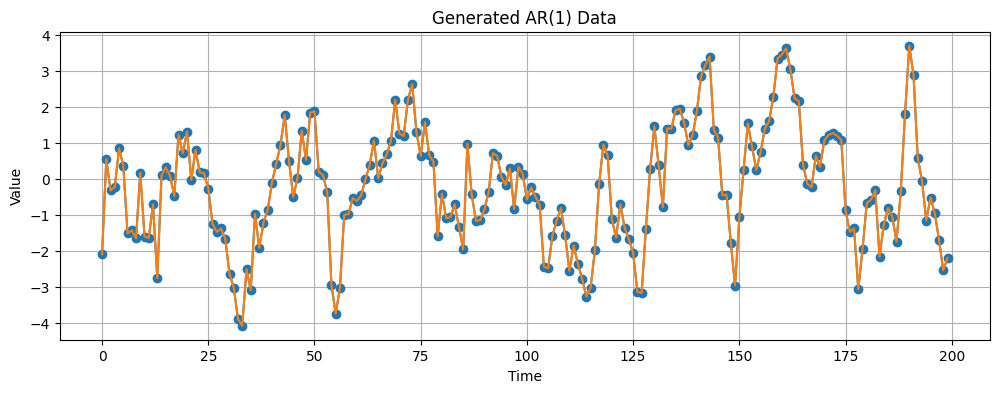

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(ar1_data, marker='o')
plt.plot(ar1_data)
plt.title('Generated AR(1) Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

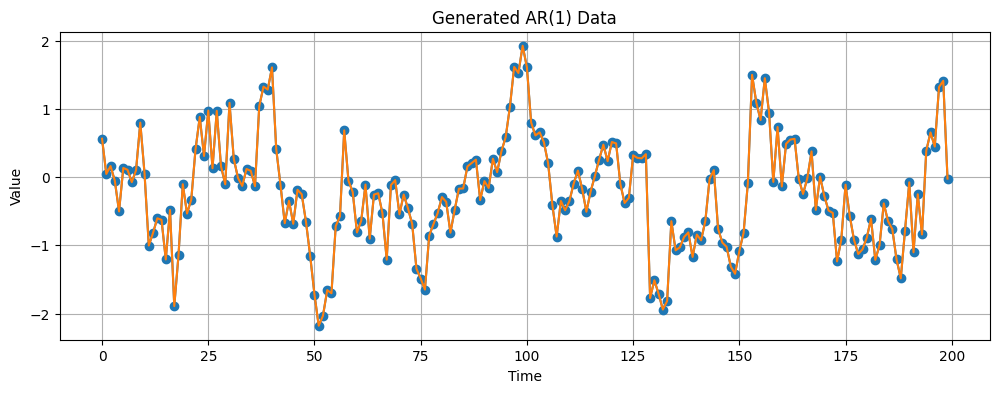

In [5]:
ar1_data = generate_ar1(phi, 0.5, n_samples)

plt.figure(figsize=(12, 4))
plt.plot(ar1_data, marker='o')
plt.plot(ar1_data)
plt.title('Generated AR(1) Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

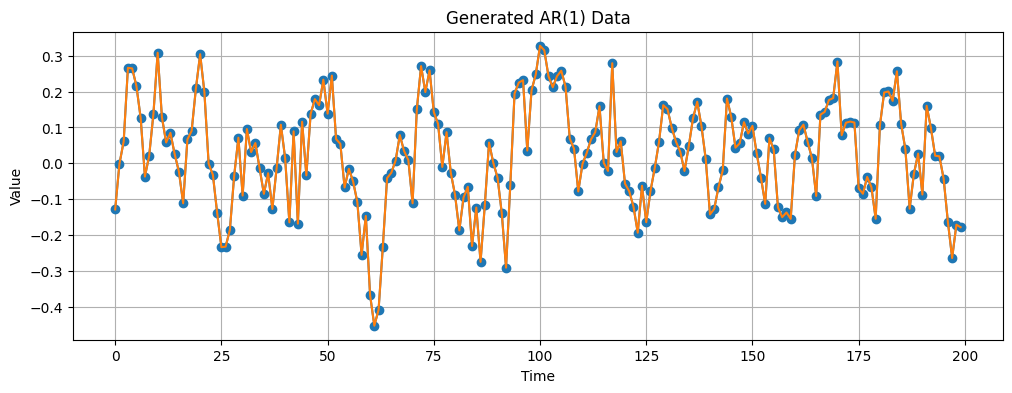

In [8]:
ar1_data = generate_ar1(phi, 0.1, n_samples)

plt.figure(figsize=(12, 4))
plt.plot(ar1_data, marker='o')
plt.plot(ar1_data)
plt.title('Generated AR(1) Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# VAR

In [4]:
def generate_var(phi_matrix, sigma, n_samples):
    num_vars = phi_matrix.shape[0]
    data = np.random.multivariate_normal(np.zeros(num_vars), np.eye(num_vars) * sigma, n_samples)
    
    for t in range(1, n_samples):
        data[t] = np.dot(phi_matrix, data[t-1]) + data[t]
        
    return data


In [13]:

# 設定參數
phi_matrix = np.array([[0.8, 0.2], [-0.3, 0.5]])
sigma = 1.0
n_samples = 100

# 生成 VAR(1) 資料
var_data = generate_var(phi_matrix, sigma, n_samples)

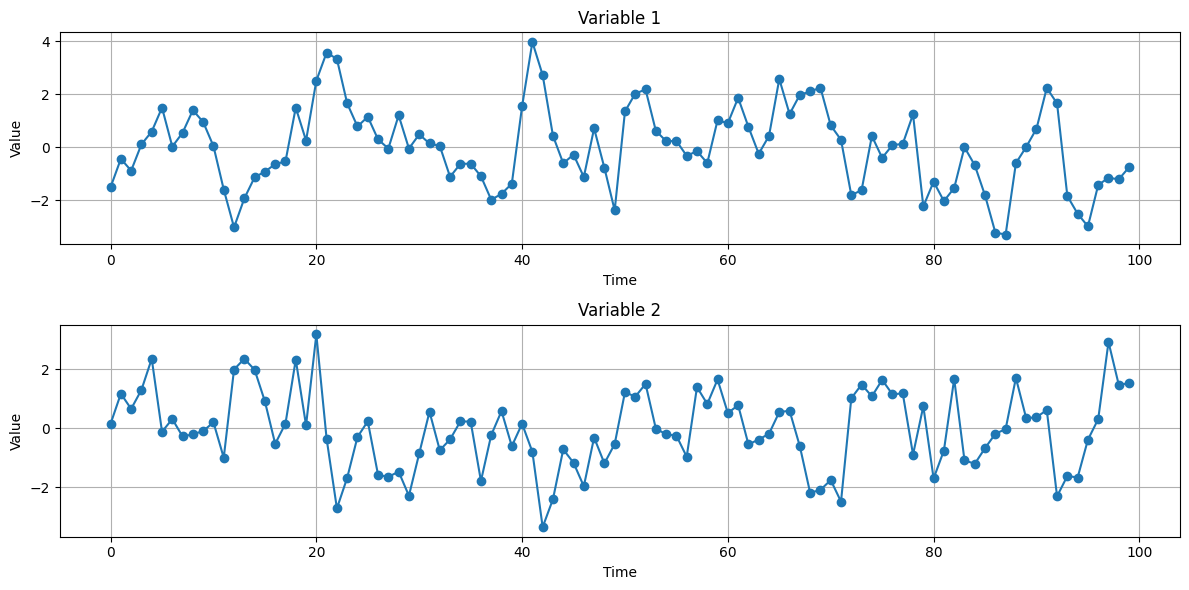

In [17]:
num_vars = phi_matrix.shape[0]
fig, axs = plt.subplots(num_vars, 1, figsize=(12, 6))

for i in range(num_vars):
    axs[i].plot(var_data[:, i], marker='o')
    axs[i].set_title(f'Variable {i + 1}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

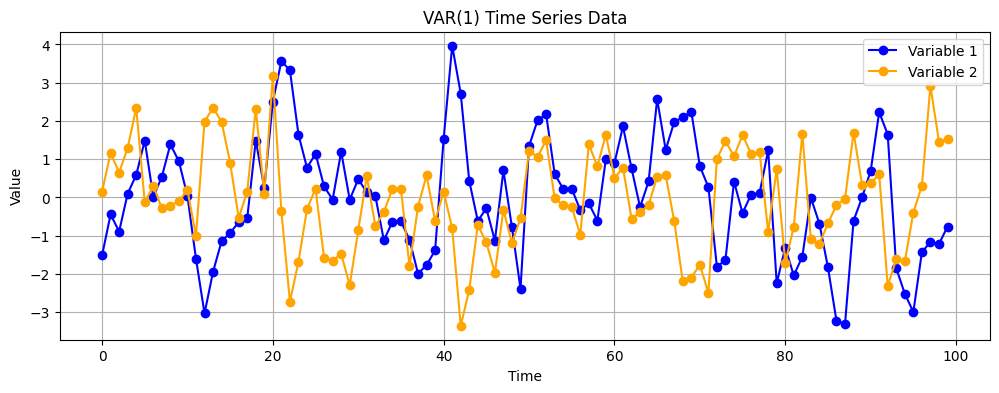

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(var_data[:, 0], marker='o', label='Variable 1', color='blue')
plt.plot(var_data[:, 1], marker='o', label='Variable 2', color='orange')
plt.title('VAR(1) Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# AR seasonal

In [2]:
import numpy as np

def generate_ar1_sea(phi, sigma, n_samples, seasonal_freq=None, seasonal_amplitude=1.0):
    ar_data = [np.random.normal(0, sigma)]
    
    if seasonal_freq is not None:
        seasonal_phase = np.random.uniform(0, 2 * np.pi)
    else:
        seasonal_phase = 0.0
    
    for _ in range(1, n_samples):
        new_value = phi * ar_data[-1] + np.random.normal(0, sigma)
        
        if seasonal_freq is not None:
            seasonal_value = seasonal_amplitude * np.sin(seasonal_freq * _ + seasonal_phase)
            new_value += seasonal_value
        
        ar_data.append(new_value)
        
    return ar_data



In [15]:
# 使用範例：
phi = 0.8
sigma = 0.1
n_samples = 200
seasonal_freq = 2 * np.pi / 12  # 季節性頻率，假設為每年12個月
seasonal_amplitude = 0.1
np.random.seed(0)
ar_data_with_seasonal = generate_ar1_sea(phi, sigma, n_samples, seasonal_freq, seasonal_amplitude)


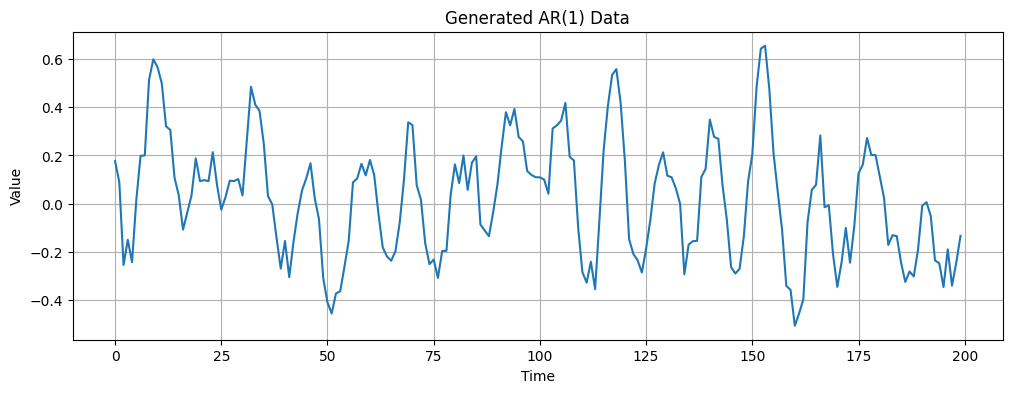

In [16]:
plt.figure(figsize=(12, 4))
# plt.plot(ar_data_with_seasonal, marker='o')
plt.plot(ar_data_with_seasonal)
plt.title('Generated AR(1) Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# save seasonal AR data

In [3]:
# 生成 10000 個長度為 1000 的 AR(1) 時間序列，每次迴圈給訂新的隨機種子

phi = 0.8
sigma = 0.1
seasonal_freq = 2 * np.pi / 12  # 季節性頻率，假設為每年12個月
seasonal_amplitude = 0.1

# train
n_samples = 200
num_series = 3000
ar1_matrix = np.zeros((num_series, n_samples, 1))

for i in range(num_series):
    seed = i  # 使用迴圈索引作為種子
    np.random.seed(seed)
    ar1_matrix[i, :, 0]  = generate_ar1_sea(phi, sigma, n_samples, seasonal_freq, seasonal_amplitude)

# 儲存 ar1_matrix 為 .npy 檔案
output_file = f'train_ar1_sea_{num_series}_{n_samples}.npy'
np.save(output_file, ar1_matrix)    

In [7]:
# test
n_samples = 200
num_series = 1000
ar1_matrix = np.zeros((num_series, n_samples, 1))

for i in range(num_series):
    seed = i + 123400000 # 使用迴圈索引作為種子
    np.random.seed(seed)
    ar1_matrix[i, :, 0] = generate_ar1_sea(phi, sigma, n_samples, seasonal_freq, seasonal_amplitude)

# 儲存 ar1_matrix 為 .npy 檔案
output_file = f'test_ar1_sea_{num_series}_{n_samples}.npy'
np.save(output_file, ar1_matrix)


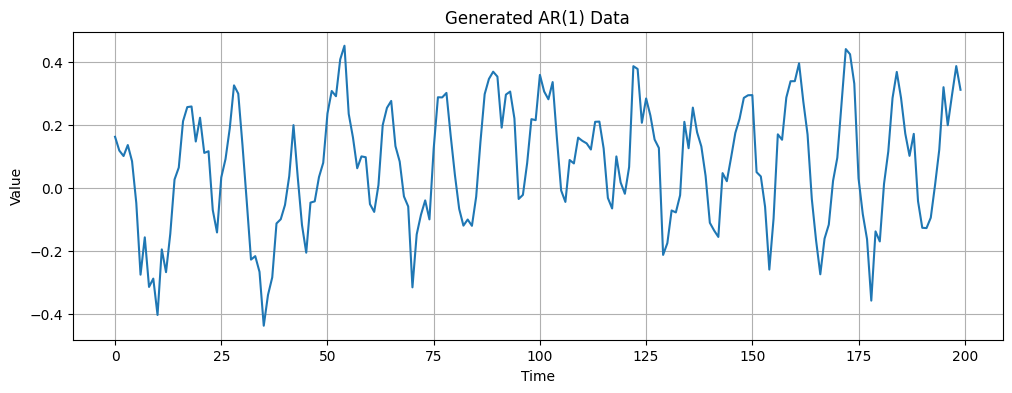

In [9]:
data = np.load("train_ar1_sea_3000_200.npy")
data.shape

plt.figure(figsize=(12, 4))
# plt.plot(ar1_data, marker='o')
plt.plot(data[1,:,:])
plt.title('Generated AR(1) Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

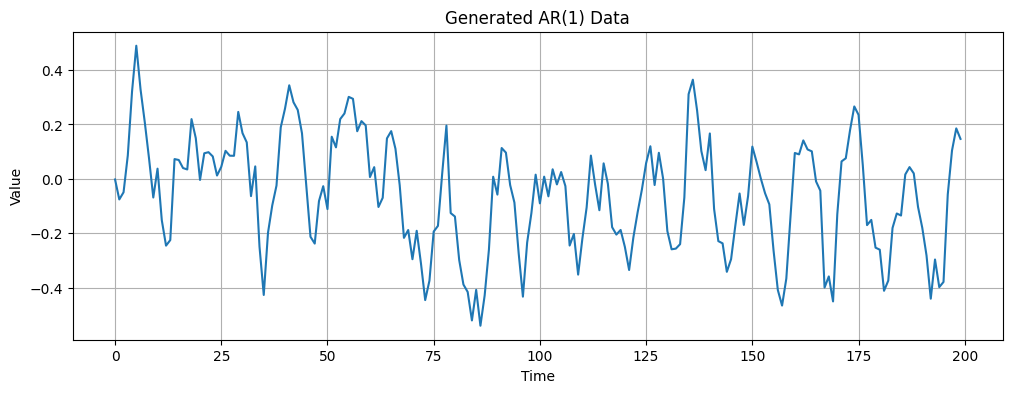

In [8]:
data = np.load("test_ar1_sea_1000_200.npy")
data.shape

plt.figure(figsize=(12, 4))
# plt.plot(ar1_data, marker='o')
plt.plot(data[1,:,:])
plt.title('Generated AR(1) Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# save AR data

In [3]:
# 生成 10000 個長度為 1000 的 AR(1) 時間序列，每次迴圈給訂新的隨機種子
# 需花 18.7 sec, n_samples = 1000 num_series = 10000, 檔案大小 76 MB 

phi = 0.8 # 自回歸係數 
sigma = 1.0 # 隨機誤差項的標準差

# train
n_samples = 50
num_series = 80
ar1_matrix = np.zeros((num_series, n_samples, 1))

for i in range(num_series):
    seed = i  # 使用迴圈索引作為種子
    np.random.seed(seed)
    ar1_matrix[i, :, 0] = generate_ar1(phi, sigma, n_samples)
    

# 儲存 ar1_matrix 為 .npy 檔案
output_file = f'train_ar1_{num_series}_{n_samples}.npy'
np.save(output_file, ar1_matrix)   

# test
num_series = 1000
ar1_matrix = np.zeros((num_series, n_samples, 1))

for i in range(num_series):
    seed = i + 123400000 # 使用迴圈索引作為種子
    np.random.seed(seed)
    ar1_matrix[i, :, 0] = generate_ar1(phi, sigma, n_samples)

# 儲存 ar1_matrix 為 .npy 檔案
output_file = f'test_ar1_{num_series}_{n_samples}.npy'
np.save(output_file, ar1_matrix)


# save AR w/o noise

In [12]:
# 生成 3000 個長度為 200 的 AR(1) 時間序列，每次迴圈給訂新的隨機種子
# n_samples = 1000 num_series = 3000

phi = 0.8 # 自回歸係數 
sigma = 0.8
sigma_text = '08'

# train
n_samples = 200
num_series = 3000
ar1_matrix = np.zeros((num_series, n_samples, 1))

for i in range(num_series):
    seed = i  # 使用迴圈索引作為種子
    np.random.seed(seed)
    ar1_matrix[i, :, 0] = generate_ar1(phi, sigma, n_samples)
    

# 儲存 ar1_matrix 為 .npy 檔案
output_file = f'train_ar1_{num_series}_{n_samples}_{sigma_text}.npy'
np.save(output_file, ar1_matrix)   

# test
n_samples = 200
num_series = 1000
ar1_matrix = np.zeros((num_series, n_samples, 1))

for i in range(num_series):
    seed = i + 123400000 # 使用迴圈索引作為種子
    np.random.seed(seed)
    ar1_matrix[i, :, 0] = generate_ar1(phi, sigma, n_samples)

# 儲存 ar1_matrix 為 .npy 檔案
output_file = f'test_ar1_{num_series}_{n_samples}_{sigma_text}.npy'
np.save(output_file, ar1_matrix)


In [26]:
dat = np.load('train_ar1_3000_200_01.npy')
print(dat[0,0:3,0])
dat = np.load('test_ar1_1000_200_01.npy')
print(dat[0,0:3,0])

[0.88202617 0.90569954 1.21392863]
[0.48488532 0.61443213 0.25388583]


In [13]:
f'test_ar1_{num_series}_{n_samples}_{sigma_text}.npy'


'test_ar1_1000_200_08.npy'

# Others

In [25]:
# 計算 .npy 檔案大小
import os

# 設定檔案路徑
npy_file = output_file

# 獲取檔案大小（以位元組為單位）
file_size = os.path.getsize(npy_file)

# 將位元組轉換為 KB 或 MB
if file_size < 1024:
    size_str = f'{file_size} B'
elif file_size < 1024 * 1024:
    size_str = f'{file_size / 1024:.2f} KB'
else:
    size_str = f'{file_size / (1024 * 1024):.2f} MB'

print(f'檔案大小: {size_str}')


檔案大小: 76.29 MB


# Fit an AR model

In [5]:
from statsmodels.tsa.arima.model import ARIMA
import os

file_path = os.path.join('train_ar1_10000_50.npy')
data = np.load(file_path)

In [8]:

mod = ARIMA(data[0,0:49], order=(1, 0, 0))
fit = mod.fit()

print(data[0,49])
print(fit.predict(start=50, end=50))
print(data[0,48]*0.8)

[-2.17697823]
[-1.70813493]
[-1.96423795]


In [9]:
pred = list()
for i in range(data.shape[0]):
    mod = ARIMA(data[i,0:49], order=(1, 0, 0))
    fit = mod.fit()
    pred.append(fit.predict(start=50, end=50))

/home/hchuang/anaconda3/envs/pt_fan/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hchuang/anaconda3/envs/pt_fan/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


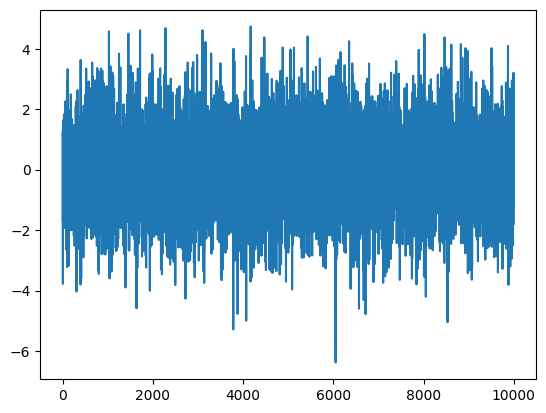

In [12]:
plt.plot(pred)
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error


print(mean_squared_error(data[:,48]*0.8, pred))
print(mean_squared_error(data[:,49], pred))

0.15514654359823676
1.1494930604833968
